In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
train_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\minist-jpg\\train"
test_data_dir = "C:\\Users\\kulka\\Downloads\\DL\\DL\\minist-jpg\\test"

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28,28),
    batch_size=train_batch_size,
    class_mode = 'sparse',
    color_mode = 'grayscale',
    shuffle = True
)

test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (28,28),
    batch_size = test_batch_size,
    class_mode = 'sparse',
    color_mode = 'grayscale',
    shuffle = True
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [14]:
xtrain,ytrain = train_generator[0]
xtest,ytest = test_generator[0]

In [15]:
model = Sequential([Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(100,activation="relu"),
                    Dense(10,activation="softmax")
])

In [16]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
history = model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1870 - accuracy: 0.7281 - val_loss: 0.4433 - val_accuracy: 0.8805
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 0.4114 - accuracy: 0.8843 - val_loss: 0.3290 - val_accuracy: 0.9065
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 0.3367 - accuracy: 0.9040 - val_loss: 0.3174 - val_accuracy: 0.9105
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 0.2974 - accuracy: 0.9138 - val_loss: 0.2867 - val_accuracy: 0.9085
Epoch 5/10
313/313 [==============================] - 3s 9ms/step - loss: 0.2723 - accuracy: 0.9226 - val_loss: 0.2430 - val_accuracy: 0.9275
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.2496 - accuracy: 0.9297 - val_loss: 0.2265 - val_accuracy: 0.9270
Epoch 7/10
313/313 [==============================] - 3s 9ms/step - loss: 0.2323 - accuracy: 0.9316 - val_loss: 0.2122 - val_accuracy: 0.9410
Epoch 

In [18]:
test_loss, test_acc = model.evaluate(xtest,ytest)
print(f"Loss: {test_loss * 100:.1f}%")
print(f"Accuracy: {test_acc * 100:.1f}%")

63/63 [==============================] - 0s 4ms/step - loss: 0.2282 - accuracy: 0.9260
Loss: 22.8%
Accuracy: 92.6%


In [19]:
predictions = model.predict(xtest)

63/63 [==============================] - 0s 4ms/step


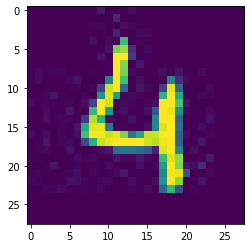

Predicted number: 4


In [22]:
n = random.randint(0,99)
plt.imshow(xtest[n])
plt.show()
print("Predicted number:",np.argmax(predictions[n]))